In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import baltic as bt
import pandas as pd
from collections import Counter
%matplotlib inline

In [2]:
sns.set(style='whitegrid', font_scale=1.2)
out_path='./png/'

In [3]:
tree = bt.loadJSON('../titer_model/shared_output/dengue_all_tree.json', json_translation={'name': 'strain', 'height': 'xvalue'})


Tree height: 0.463660
Tree length: 9.978810
annotations present

Numbers of objects in tree: 4716 (2149 nodes and 2567 leaves)



In [9]:
bins = [(k.traits['region'].replace('_', ' ').capitalize(), int(k.traits['num_date'])) for k in tree.Objects if k.branchType=='leaf']
counts = Counter(bins)
vals = pd.DataFrame([ {'region': k[0], 'year': k[1], 'N': v} for k,v in counts.items()])

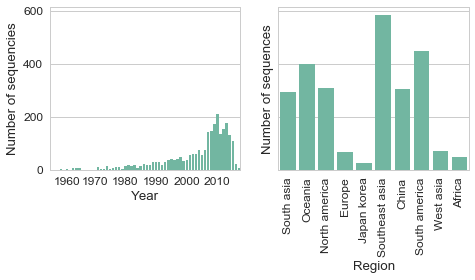

In [10]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(7.5, 3), sharey=True)
ax = sns.barplot(x='year', y='N', data=vals, ci=None, ax=axes[0], color='#66C2A5', estimator=sum)
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if int(label.get_text()) % 10 != 0:
        label.set_visible(False)
ax.set_ylabel('Number of sequencies')
ax.set_xlabel('Year')

ax = sns.barplot(x='region', y='N', data=vals, ci=None, ax=axes[1], estimator=sum, color='#66C2A5')
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    label.set_rotation(90)
ax.set_ylabel('Number of sequences')
ax.set_xlabel('Region')

plt.savefig(out_path+'sequence_distribution.png', dpi=300, bbox_inches='tight')